In [38]:
# Import required libraries for data retrieval, manipulation, and visualization

import yfinance as yf                      # To download historical stock data from Yahoo Finance
from datetime import datetime              # To work with date and time objects (e.g., filtering by date range)
import matplotlib.pyplot as plt            # To create static, interactive, and animated plots
import numpy as np                         # To perform numerical operations and work with arrays
import pandas as pd                        # To manipulate and analyze structured data
from pandas.plotting import scatter_matrix # To plot scatter matrix for pairwise relationship analysis


In [39]:
# Define the start and end dates for the data extraction period
# This sets the date range from January 1, 2025 to July 1, 2025
start = datetime(2025, 1, 1)
end = datetime(2025, 7, 1)

In [40]:
# Download historical stock data from Yahoo Finance for selected renewable energy companies
# The data spans from the start to end dates defined earlier

# Sunrun Inc. (solar energy services)
sunrun = yf.download("RUN", start=start, end=end)

# Enphase Energy Inc. (solar microinverters and storage systems)
enphase = yf.download("ENPH", start=start, end=end)

# ChargePoint Holdings Inc. (electric vehicle charging infrastructure)
charge = yf.download("CHPT", start=start, end=end)

# Generac Holdings Inc. (backup power generation, entering clean energy)
generac = yf.download("GNRC", start=start, end=end)

# SolarEdge Technologies Inc. (solar inverters and energy solutions)
solar = yf.download("SEDG", start=start, end=end)

C:\Users\fluff\AppData\Local\Temp\ipykernel_20188\1196881757.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sunrun = yf.download("RUN", start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\fluff\AppData\Local\Temp\ipykernel_20188\1196881757.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  enphase = yf.download("ENPH", start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\fluff\AppData\Local\Temp\ipykernel_20188\1196881757.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  charge = yf.download("CHPT", start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\fluff\AppData\Local\Temp\ipykernel_20188\1196881757.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  generac = yf.download("GNRC", start=start, end=end

In [41]:
# Combine the 'Open' prices from all five stocks into a single DataFrame
# This allows for side-by-side comparison or collective analysis

key = pd.concat([
    sunrun['Open'],     # Sunrun opening prices
    enphase['Open'],    # Enphase opening prices
    charge['Open'],     # ChargePoint opening prices
    generac['Open'],    # Generac opening prices
    solar['Open']       # SolarEdge opening prices
], axis=1)


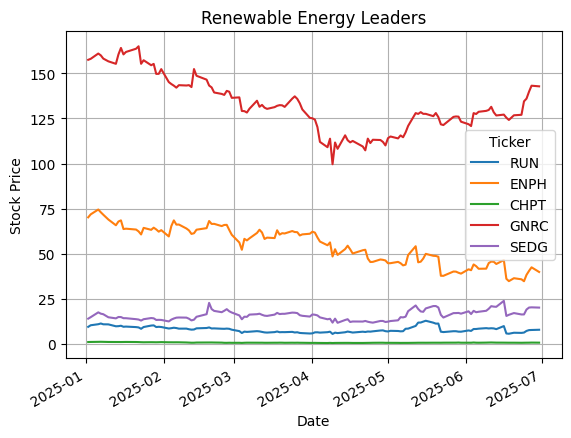

In [42]:
# Plot the 'Open' prices of all selected renewable energy companies
# This visualization shows how each stock's price moved over time

key.plot()  # Line plot of the combined DataFrame from the previous cell
plt.title("Renewable Energy Leaders")       # Title of the chart
plt.ylabel("Stock Price")                   # Y-axis label
plt.xlabel("Date")                          # X-axis label
plt.grid(True)                              # Enable grid for better readability


In [43]:
# Combine 'Volume' data for all selected stocks into a single DataFrame
# This allows comparison of trading volume across the different companies

volume = pd.concat([
    sunrun['Volume'],    # Sunrun Inc. trading volume
    enphase['Volume'],   # Enphase Energy Inc. trading volume
    charge['Volume'],    # ChargePoint Holdings Inc. trading volume
    generac['Volume'],   # Generac Holdings Inc. trading volume
    solar['Volume']      # SolarEdge Technologies Inc. trading volume
], axis=1)


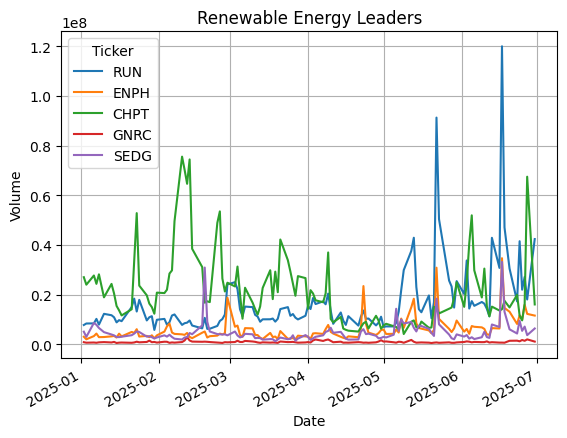

In [44]:
# Plot trading volume for all selected renewable energy stocks
# This visual helps identify periods of high or low market activity for each stock

volume.plot()
plt.title("Renewable Energy Leaders")  # Title of the plot
plt.ylabel("Volume")                  # Y-axis label indicating share volume
plt.xlabel("Date")                    # X-axis label for the timeline
plt.grid(True)                        # Adds a grid for better readability

In [45]:
# Find the date(s) where each stock had its highest trading volume within the dataset
# Returns a Series with the date index for the max volume per stock

volume.idxmax()

Ticker
RUN    2025-06-17
ENPH   2025-06-17
CHPT   2025-02-10
GNRC   2025-02-12
SEDG   2025-06-17
dtype: datetime64[ns]

In [46]:
# Extract specific date ranges of 'Open' prices for each stock to analyze short-term trends or specific periods

srpva = sunrun['Open'].loc["2025-05-17":"2025-07-17"]     # Sunrun from May 17 to July 17, 2025
epva = enphase['Open'].loc["2025-05-17":"2025-07-17"]    # Enphase same date range
cpva = charge['Open'].loc["2025-01-10":"2025-03-10"]     # ChargePoint from Jan 10 to Mar 10, 2025
gpva = generac['Open'].loc["2025-01-12":"2025-03-12"]    # Generac from Jan 12 to Mar 12, 2025
spva = solar['Open'].loc["2025-05-17":"2025-07-17"]      # SolarEdge same as Sunrun and Enphase

In [47]:
# Combine the extracted 'Open' price slices from each stock into one DataFrame
# This facilitates comparative analysis or visualization of these specific periods

pva = pd.concat([
    srpva,  # Sunrun partial date range
    epva,   # Enphase partial date range
    cpva,   # ChargePoint partial date range
    gpva,   # Generac partial date range
    spva    # SolarEdge partial date range
], axis=1)

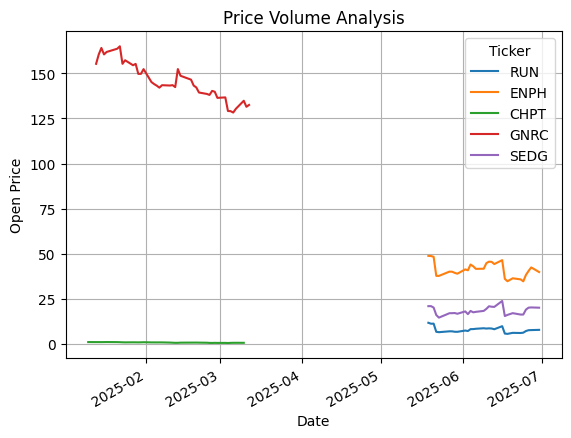

In [48]:
# Plot the concatenated 'Open' prices for the selected date ranges across stocks
# This visualization compares price movements in the specified windows

pva.plot()
plt.title("Price Volume Analysis")  # Chart title
plt.xlabel("Date")                   # X-axis label for timeline
plt.ylabel("Open Price")             # Y-axis label for stock prices
plt.grid(True)                      # Enable grid lines for easier reading

In [69]:
# Calculate the total traded value (dollar amount) for each stock on each day
# This is done by multiplying the opening price by the volume traded
def add_total_traded(df):
    # Extract the 'Open' price series; multiply by 'Volume' to get total traded value
    df['Total Traded'] = df['Open'].squeeze() * df['Volume'].squeeze()
    return df

In [93]:
# Apply the 'add_total_traded' function to each stock DataFrame
# This function calculates the total traded value (Open price * Volume) and adds it as a new column
sunrun = add_total_traded(sunrun)
enphase = add_total_traded(enphase)
charge = add_total_traded(charge)
generac = add_total_traded(generac)
solar = add_total_traded(solar)

In [72]:
# Combine the 'Total Traded' columns from each stock into one DataFrame
# Rename each column with the corresponding stock ticker for easier identification
total_traded = pd.concat([
    sunrun['Total Traded'].rename('RUN'),
    enphase['Total Traded'].rename('ENPH'),
    charge['Total Traded'].rename('CHPT'),
    generac['Total Traded'].rename('GNRC'),
    solar['Total Traded'].rename('SEDG')
], axis=1)

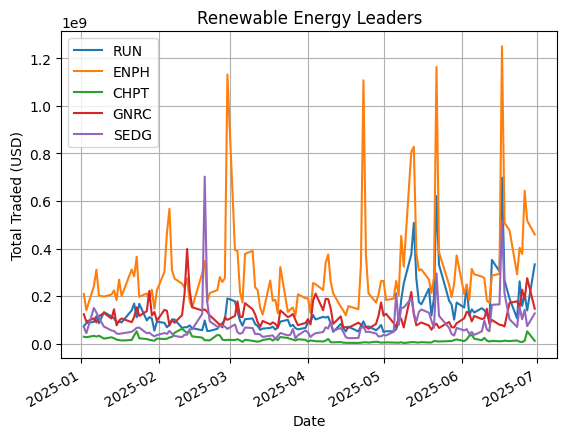

In [73]:
# Plot the total traded value over time for selected renewable energy stocks
total_traded.plot()                         # Line plot of total traded values (Open × Volume)

# Customize plot appearance
plt.title("Renewable Energy Leaders")       # Set the chart title
plt.ylabel("Total Traded (USD)")            # Label the y-axis with traded dollar amount
plt.xlabel("Date")                          # Label the x-axis with dates
plt.grid(True)                              # Add a grid for easier visual analysis

# Display the plot
plt.show()

In [94]:
# Find the row (date) for each stock where 'Total Traded' value was the highest
# Use iloc with argmax to select the specific row, then concatenate them side by side
# This results in a DataFrame showing the peak trading day for each stock

max_traded_rows = pd.concat([
    sunrun.iloc[[sunrun['Total Traded'].argmax()]],
    enphase.iloc[[enphase['Total Traded'].argmax()]],
    charge.iloc[[charge['Total Traded'].argmax()]],
    generac.iloc[[generac['Total Traded'].argmax()]],
    solar.iloc[[solar['Total Traded'].argmax()]]
], axis=1)

In [84]:
# Extract specific date ranges from the 'Total Traded' columns for each stock
# This allows for focused analysis of trading activity during certain time windows

srtt = sunrun['Total Traded'].loc["2025-05-17":"2025-07-17"]     # Sunrun: Mid-May to Mid-July 2025
ett = enphase['Total Traded'].loc["2025-05-17":"2025-07-17"]     # Enphase: Same as Sunrun
ctt = charge['Total Traded'].loc["2025-05-24":"2025-07-24"]      # ChargePoint: Late May to Late July 2025
gtt = generac['Total Traded'].loc["2025-01-12":"2025-03-12"]     # Generac: Mid-January to Mid-March 2025
stt = solar['Total Traded'].loc["2025-01-19":"2025-03-19"]       # SolarEdge: Mid-January to Mid-March 2025

In [91]:
# Combine the extracted 'Total Traded' slices from each stock into one DataFrame
# This combined DataFrame enables side-by-side comparison of trading volume (in dollar terms)
# across the selected date ranges for each stock

tta = pd.concat([
    srtt.rename('RUN'),    # Sunrun partial period
    ett.rename('ENPH'),    # Enphase partial period
    ctt.rename('CHPT'),    # ChargePoint partial period
    gtt.rename('GNRC'),    # Generac partial period
    stt.rename('SEDG')     # SolarEdge partial period
], axis=1)

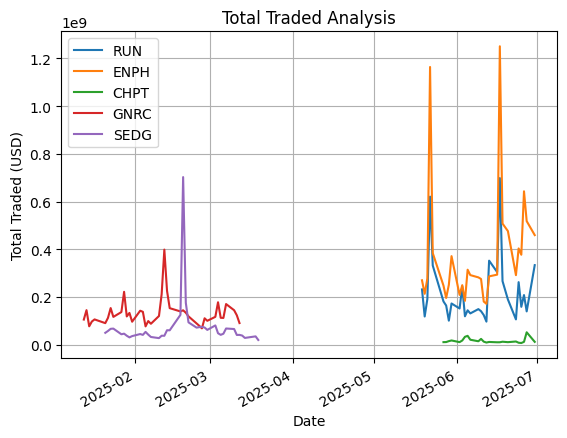

In [95]:
# Plot the concatenated 'Total Traded' values for the selected date ranges across all stocks
# This visualization highlights and compares the trading activity (in dollar volume)
# over the user-specified time windows for each renewable energy stock

tta.plot()
plt.title("Total Traded Analysis")     # Chart title summarizing the plot
plt.xlabel("Date")                     # X-axis label showing the timeline
plt.ylabel("Total Traded (USD)")       # Y-axis label indicating dollar volume
plt.grid(True)                         # Add grid lines for better readability

In [20]:
# Define a function to calculate moving averages on the 'Open' price of a stock DataFrame
def apply_mas(df):
    # Extract the 'Open' price series; squeeze ensures compatibility in case it's a single-column DataFrame
    open_series = df['Open'].squeeze()
    
    # Calculate 10-day, 30-day, and 50-day simple moving averages on the 'Open' price
    df['MA10'] = open_series.rolling(10).mean()   # 10-day moving average
    df['MA30'] = open_series.rolling(30).mean()   # 30-day moving average
    df['MA50'] = open_series.rolling(50).mean()   # 50-day moving average
    
    # Return the modified DataFrame with new MA columns
    return df

In [21]:
# Apply the moving average function to each stock DataFrame
# This will add 'MA10', 'MA30', and 'MA50' columns based on the 'Open' price

sunrun = apply_mas(sunrun)     # Apply to Sunrun stock data
enphase = apply_mas(enphase)   # Apply to Enphase stock data
charge = apply_mas(charge)     # Apply to ChargePoint stock data
generac = apply_mas(generac)   # Apply to Generac stock data
solar = apply_mas(solar)       # Apply to SolarEdge stock data

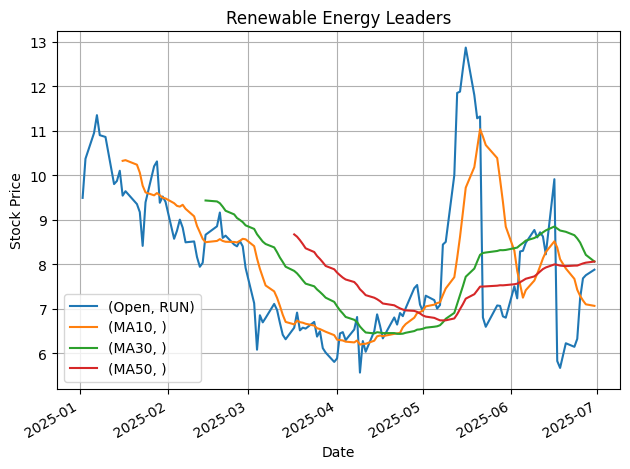

In [23]:
# Plot Sunrun's stock 'Open' prices alongside its 10, 30, and 50-day moving averages

sunrun[['Open', 'MA10', 'MA30', 'MA50']].plot()      # Plot the stock price and MAs
plt.title("Renewable Energy Leaders")                # Set the chart title
plt.ylabel("Stock Price")                            # Label the y-axis (stock price in USD)
plt.xlabel("Date")                                   # Label the x-axis (dates over time)
plt.legend()                                         # Display legend for plotted lines
plt.tight_layout()                                   # Adjust layout to prevent label cutoff
plt.grid(True)                                       # Add gridlines for better readability


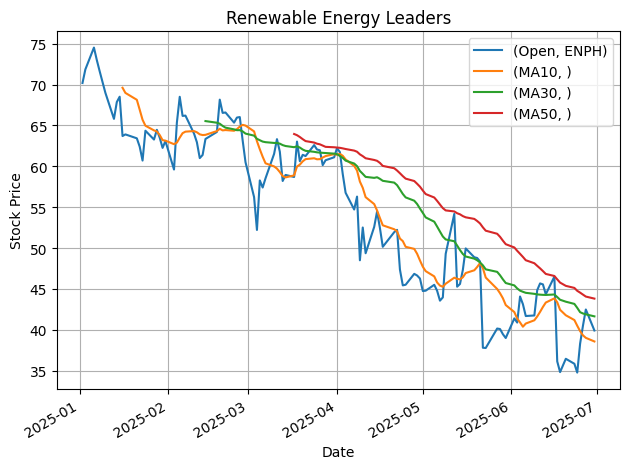

In [24]:
# Plot Enphase's 'Open' stock price along with its 10, 30, and 50-day moving averages

enphase[['Open', 'MA10', 'MA30', 'MA50']].plot()     # Plot original and smoothed stock price data
plt.title("Renewable Energy Leaders")                # Set the plot title
plt.ylabel("Stock Price")                            # Y-axis label (price in USD)
plt.xlabel("Date")                                   # X-axis label (time progression)
plt.legend()                                         # Show legend to differentiate the lines
plt.tight_layout()                                   # Ensure labels and title fit within the figure
plt.grid(True)                                       # Add gridlines for easier visual analysis

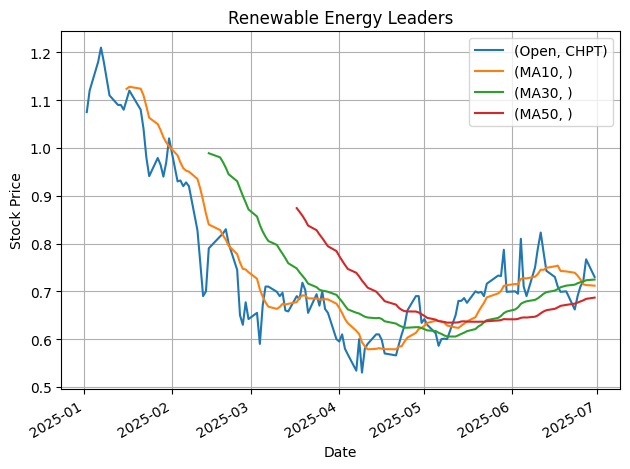

In [25]:
# Plot ChargePoint's 'Open' stock price along with its 10, 30, and 50-day moving averages

charge[['Open', 'MA10', 'MA30', 'MA50']].plot()     # Plot original and moving average stock prices
plt.title("Renewable Energy Leaders")               # Set chart title
plt.ylabel("Stock Price")                           # Label for Y-axis (price in USD)
plt.xlabel("Date")                                  # Label for X-axis (dates)
plt.legend()                                        # Display legend to identify each line
plt.tight_layout()                                  # Adjust layout to prevent clipping of labels
plt.grid(True)                                      # Enable grid for better readability

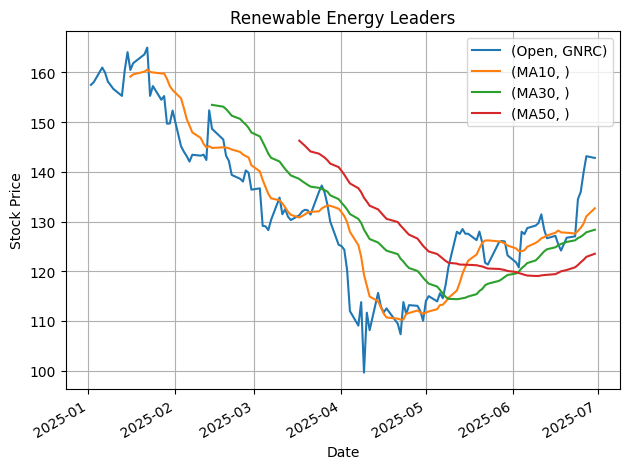

In [26]:
# Plot Generac's 'Open' stock price along with its 10, 30, and 50-day moving averages

generac[['Open', 'MA10', 'MA30', 'MA50']].plot()   # Plot original and moving average stock prices
plt.title("Renewable Energy Leaders")              # Set chart title
plt.ylabel("Stock Price")                          # Label for Y-axis (price in USD)
plt.xlabel("Date")                                 # Label for X-axis (timeline)
plt.legend()                                       # Show legend to differentiate lines
plt.tight_layout()                                 # Optimize layout to avoid label overlap
plt.grid(True)                                     # Add grid for visual clarity


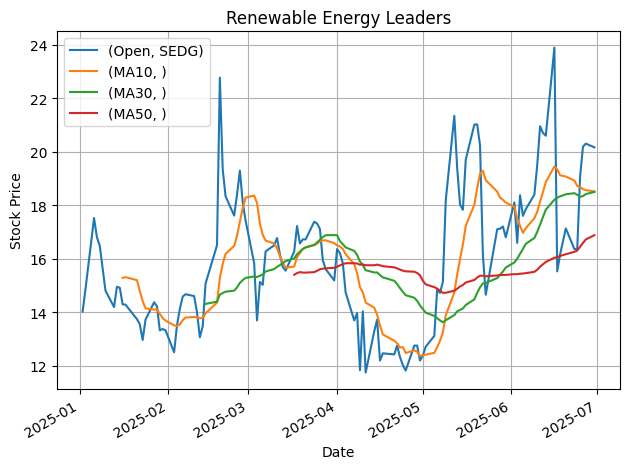

In [27]:
# Plot Solar's 'Open' stock price and its 10, 30, and 50-day moving averages

solar[['Open', 'MA10', 'MA30', 'MA50']].plot()   # Plot the original 'Open' price and moving averages
plt.title("Renewable Energy Leaders")            # Set the plot title
plt.ylabel("Stock Price")                        # Label Y-axis to show stock price in USD
plt.xlabel("Date")                               # Label X-axis to show the timeline
plt.legend()                                     # Display a legend for each plotted line
plt.tight_layout()                               # Adjust layout to fit all elements neatly
plt.grid(True)                                   # Add grid lines for better visual readability

array([[<Axes: xlabel='RUN', ylabel='RUN'>,
        <Axes: xlabel='ENPH', ylabel='RUN'>,
        <Axes: xlabel='CHPT', ylabel='RUN'>,
        <Axes: xlabel='GNRC', ylabel='RUN'>,
        <Axes: xlabel='SEDG', ylabel='RUN'>],
       [<Axes: xlabel='RUN', ylabel='ENPH'>,
        <Axes: xlabel='ENPH', ylabel='ENPH'>,
        <Axes: xlabel='CHPT', ylabel='ENPH'>,
        <Axes: xlabel='GNRC', ylabel='ENPH'>,
        <Axes: xlabel='SEDG', ylabel='ENPH'>],
       [<Axes: xlabel='RUN', ylabel='CHPT'>,
        <Axes: xlabel='ENPH', ylabel='CHPT'>,
        <Axes: xlabel='CHPT', ylabel='CHPT'>,
        <Axes: xlabel='GNRC', ylabel='CHPT'>,
        <Axes: xlabel='SEDG', ylabel='CHPT'>],
       [<Axes: xlabel='RUN', ylabel='GNRC'>,
        <Axes: xlabel='ENPH', ylabel='GNRC'>,
        <Axes: xlabel='CHPT', ylabel='GNRC'>,
        <Axes: xlabel='GNRC', ylabel='GNRC'>,
        <Axes: xlabel='SEDG', ylabel='GNRC'>],
       [<Axes: xlabel='RUN', ylabel='SEDG'>,
        <Axes: xlabel='ENPH', ylabel='SE

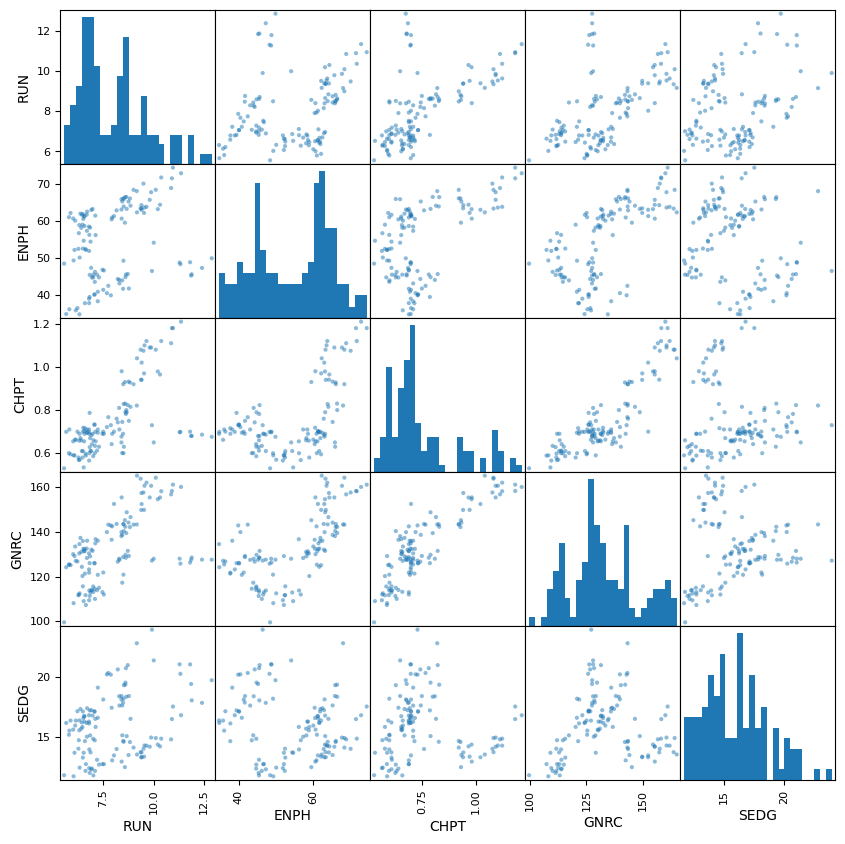

In [28]:
# Generate a scatter matrix plot to visualize pairwise relationships
# and distributions among the 'Open' prices of the selected renewable energy stocks

scatter_matrix(
    key,                    # DataFrame containing 'Open' prices of all stocks
    figsize=(10, 10),       # Size of the figure in inches (width, height)
    hist_kwds={'bins': 25}  # Histogram settings: number of bins for diagonal plots
)


In [29]:
# Calculate daily returns for each stock using the 'Close' price
# Daily return formula: (current close price / previous close price) - 1

# Sunrun returns
src = sunrun['Close']['RUN']                     
sunrun['returns'] = (src / src.shift(1)) - 1     

# Enphase returns
ec = enphase['Close']['ENPH']                     
enphase['returns'] = (ec / ec.shift(1)) - 1       

# ChargePoint returns
cc = charge['Close']['CHPT']                       
charge['returns'] = (cc / cc.shift(1)) - 1        

# Generac returns
gc = generac['Close']['GNRC']                      
generac['returns'] = (gc / gc.shift(1)) - 1       

# SolarEdge returns
sc = solar['Close']['SEDG']                        
solar['returns'] = (sc / sc.shift(1)) - 1          

In [30]:
# Combine daily returns from all stocks into a single DataFrame
# Rename each series to the corresponding stock ticker symbol
# Drop any rows with NaN values to ensure clean data for analysis

returns = pd.concat([
    sunrun['returns'].rename('RUN'),
    enphase['returns'].rename('ENPH'),
    charge['returns'].rename('CHPT'),
    generac['returns'].rename('GNRC'),
    solar['returns'].rename('SEDG')
], axis=1).dropna()

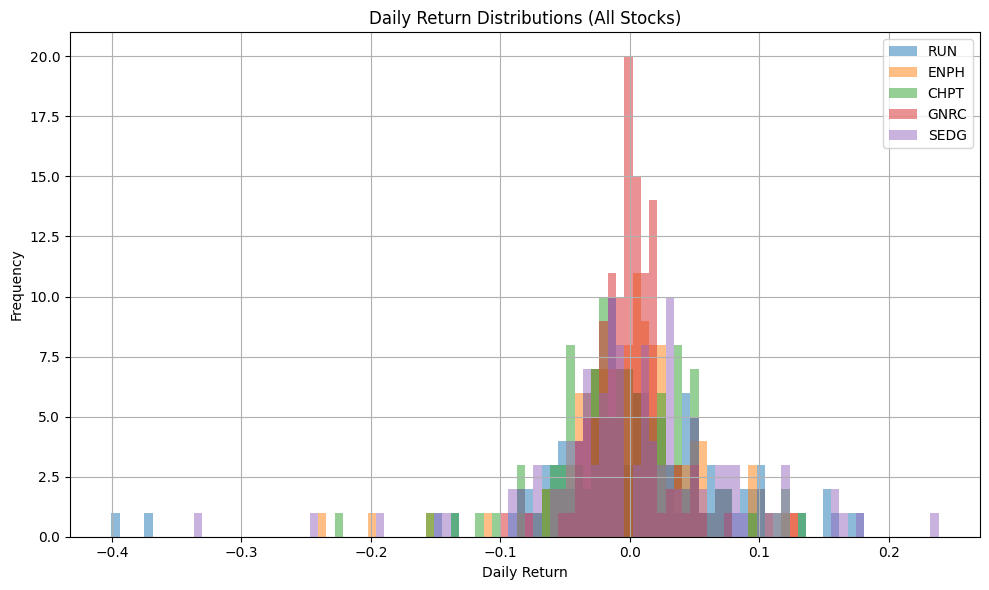

In [31]:
# Plot histogram of daily returns for all stocks
# bins=100 for detailed distribution
# alpha=0.5 for semi-transparent overlapping histograms
# figsize sets the size of the plot for better visibility
# Add title and axis labels for clarity
# Enable grid and tight layout for neatness
# Show the plot

returns.plot.hist(bins=100, alpha=0.5, figsize=(10, 6))
plt.title('Daily Return Distributions (All Stocks)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

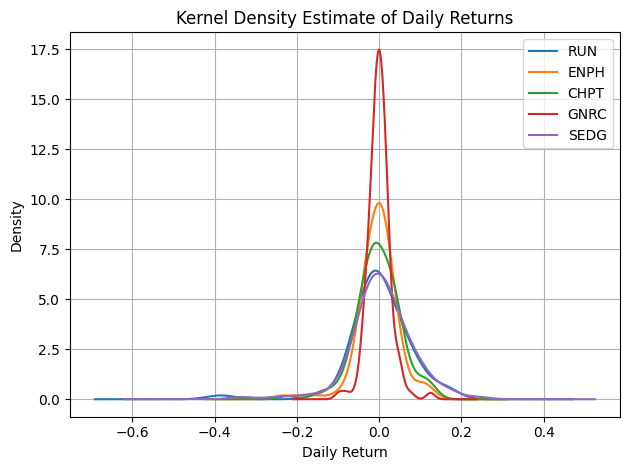

In [32]:
# Plot Kernel Density Estimate (KDE) for the daily returns of all stocks
# KDE provides a smooth estimate of the probability density function
# Useful to visualize the distribution shape and compare return profiles

returns.plot(kind='kde')
plt.title('Kernel Density Estimate of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


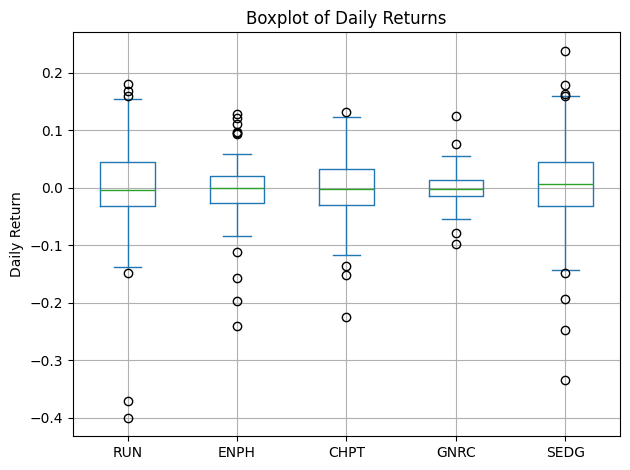

In [33]:
# Plot boxplot for the daily returns of all stocks
# Boxplot shows the distribution summary: median, quartiles, and potential outliers
# Useful for comparing the spread and skewness of returns across different stocks

returns.plot(kind='box')
plt.title('Boxplot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.tight_layout()
plt.show()

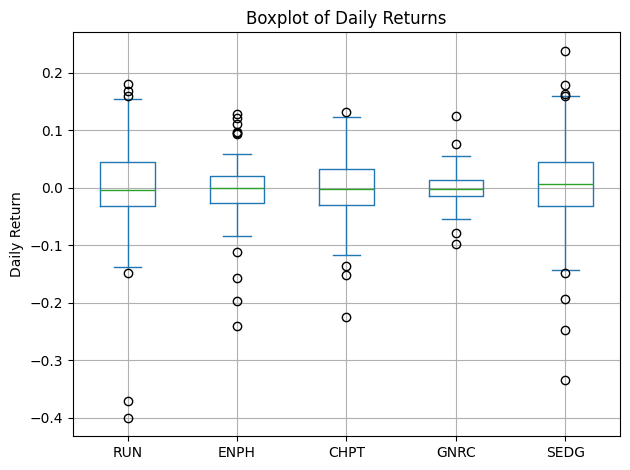

In [34]:
# Plot boxplot for the daily returns of all stocks
# Boxplot shows the distribution summary: median, quartiles, and potential outliers
# Useful for comparing the spread and skewness of returns across different stocks

returns.plot(kind='box')
plt.title('Boxplot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# Calculate Cumulative Returns for each stock
# Cumulative return is computed by taking the cumulative product of (1 + daily return)
# This shows the growth of $1 invested over time, accounting for compounding returns

sunrun['Cumulative Returns'] = (1 + sunrun['returns']).cumprod()
enphase['Cumulative Returns'] = (1 + enphase['returns']).cumprod()
charge['Cumulative Returns'] = (1 + charge['returns']).cumprod()
generac['Cumulative Returns'] = (1 + generac['returns']).cumprod()
solar['Cumulative Returns'] = (1 + solar['returns']).cumprod()

In [36]:
# Combine the Cumulative Returns from each stock into a single DataFrame
# Each column is renamed to the respective stock ticker symbol for clarity
# This allows easy comparison and plotting of cumulative returns across stocks

Cumulative_Returns = pd.concat([
    sunrun['Cumulative Returns'].rename('RUN'),
    enphase['Cumulative Returns'].rename('ENPH'),
    charge['Cumulative Returns'].rename('CHPT'),
    generac['Cumulative Returns'].rename('GNRC'),
    solar['Cumulative Returns'].rename('SEDG')
], axis=1)


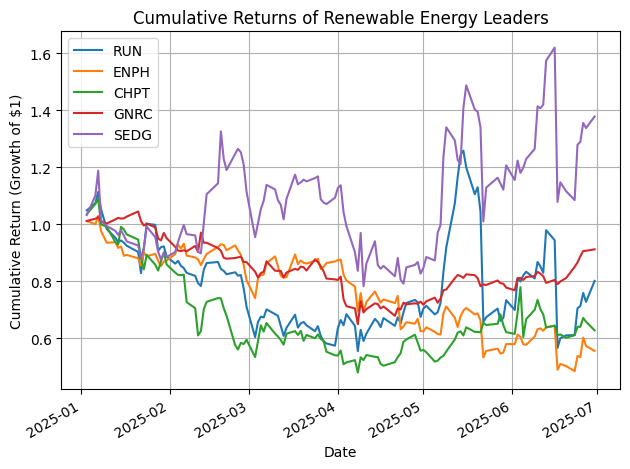

In [37]:
# Plot the cumulative returns of all stocks over time
# This visualization shows the growth of $1 invested in each stock over the period
# Helps to compare overall performance of the renewable energy leaders

Cumulative_Returns.plot()
plt.title("Cumulative Returns of Renewable Energy Leaders")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Growth of $1)")
plt.grid(True)
plt.tight_layout()
plt.show()